# Monte Carlo Simulation for Sales Commision Distribution

The Problem is as follows:
1. There are a given number of sales representative who have to meet the Target sales, and based on the percentage of the target reached they are alloted a commision rate.
2. We have already known two types of ditributions from the historical data namely:
    a. Percent to target: Follows a normal distribution.
    b. Target Sales frequency distribution: This represents the target sale value with its probability
3. We use this data to perform Monte Carlo Simulations.

What is the problem statement?
The company sales manager is asked to allocate a certain amount of budget for the sales department. He has to make a decision taking into the consideration, the total sales target, total actual sales achieved and the commision based on precent of the target achieved.

Diving deep into the problem statement:
    1. The commission rate depends on the percent of the Target sales achieved by the sales representative.
    2. We are given the bucket of commission rate for the percent of the target sales achieved by the representatives. as shown in the table below.
    3. We use this commission rate to calculate the total commission of a representative.
    4. The problem statement wants us to calculate the distribution of the 

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# First let us define the parameters of the Normal distribution
mean = 1
std = 0.1 # standard of the normal distribution
num_reps = 500 # number of sales representatives
num_sim = 1000 # number of simulation to be carried out

In [6]:
# Generating 500 samples of the percent to target for each of the representatives.
percent_to_target = np.random.normal(mean, std, num_reps)
percent_to_target.shape

(500,)

In [56]:
# Lets generate the frequency distribution for the Sales Target with its  frequency(or the probability)
sales_target = [75000, 100000, 200000, 300000, 400000, 500000]
sales_target_prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]
sales_df = pd.DataFrame({'Sales_target': sales_target,
                         'Count':sales_target_prob})
np.random.choice(sales_target, 10, p=sales_target_prob)

array([100000,  75000, 300000,  75000,  75000,  75000, 100000, 100000,
        75000,  75000])

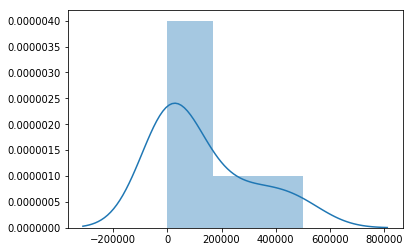

In [57]:
sns.distplot(sales_df)

In [27]:
def commission_rate_cal(x):
    if x <= 0.9:
        return 0.02
    elif x > 0.9 and x <= 0.99:
        return 0.03
    else:
        return 0.04

In [29]:
def data_append(s):
    sales_dict['Total_actual_sales'].append(s[0])
    sales_dict['Total_commission'].append(s[1])
    sales_dict['Total_sales_target'].append(s[2])
    #return sales_dict

In [47]:
sales_dict = {'Total_actual_sales': [],
              'Total_commission': [],
              'Total_sales_target': []}
for i in range(num_sim):
    results = []
    # generate target sales for each representative based on the historical data.
    rep_sales_target = np.random.choice(sales_target, num_reps, p=sales_target_prob)
    
    # Generate the percent to target based on the probability distribution of the 
    # target percent achieved by representatives.
    rep_percent_to_target = np.random.normal(mean, std, num_reps)
    
    # Create a dataframe to calculate differernt variables such as commission rate, total actual sales,
    # actual commission.
    df = pd.DataFrame({'Sales_target': rep_sales_target,
                      'Percent_to_target': rep_percent_to_target})
    df['Actual_sales'] = df['Sales_target']*df['Percent_to_target']
    df['Commission_rate'] = df['Percent_to_target'].apply(commission_rate_cal)
    df['Actual_commission'] = df['Commission_rate']*df['Actual_sales']
    
    #Append the result to a list and finally to a dict in order to visulize the data distribution
    results.append(df['Actual_sales'].sum().round(2))
    results.append(df['Actual_commission'].sum().round(2))
    results.append(df['Sales_target'].sum().round(2))
    
    data_append(results)

final_df = pd.DataFrame(sales_dict)

In [48]:
final_df.columns

Index([u'Total_actual_sales', u'Total_commission', u'Total_sales_target'], dtype='object')

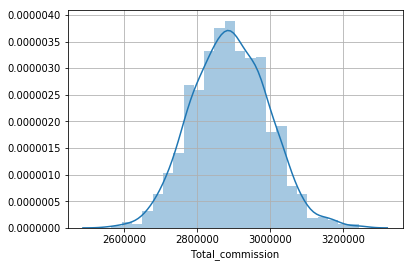

In [44]:
sns.distplot(final_df['Total_commission'])
plt.grid()

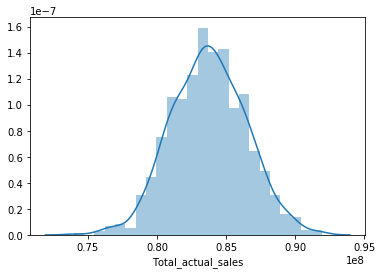

In [49]:
sns.distplot(final_df['Total_actual_sales'])

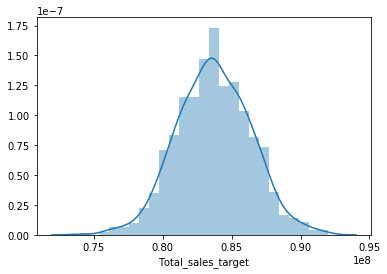

In [50]:
sns.distplot(final_df['Total_sales_target'])